In [2]:
import numpy as np #for importing numpy
import pandas as pd #for importing pandas
import warnings
warnings.filterwarnings("ignore") #this is created for ignoring warnings
import matplotlib.pyplot as plt
import seaborn as sns
import requests #requests is a package which handles all the webdata
import re #importing regex
import time #for time operations
from bs4 import BeautifulSoup #beautiful Soup is a Python library for pulling data out of HTML
from IPython.core.interactiveshell import InteractiveShell #shows loading time
InteractiveShell.ast_node_interactivity="all"

In [44]:
URL="https://www.cars.com/shopping/results/?maximum_distance=all&zip=60606&stock_type=all&makes%5B%5D=&year_min=&year_max=&list_price_min=&list_price_max=&mileage_max="

In [45]:
page=requests.get(URL)
page.status_code

200

In [46]:
pagecontent=page.text #extracts entire html data from the webpage/url
pagecontent

'<!DOCTYPE html>\n<html lang="en" class="ep-theme-cars">\n  <head>\n    <meta charset="utf-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<title data-suffix=" | Cars.com">New and Used Vehicles for Sale | Cars.com</title>\n\n    <meta name="description" content="Shop new and used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." />\n\n<meta name="robots" content="noindex, nofollow" />\n\n    <meta property="og:site_name" content="Cars.com" />\n    <meta property="og:type" content="website" />\n    <meta property="og:title" content="New and Used Vehicles for Sale | Cars.com" />\n    <meta property="og:url" content="https://www.cars.com/shopping/results" />\n    <meta property="og:description" content="Shop new and used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers dire

In [47]:
soup=BeautifulSoup(pagecontent)
soup

<!DOCTYPE html>
<html class="ep-theme-cars" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title data-suffix=" | Cars.com">New and Used Vehicles for Sale | Cars.com</title>
<meta content="Shop new and used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." name="description"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="Cars.com" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="New and Used Vehicles for Sale | Cars.com" property="og:title"/>
<meta content="https://www.cars.com/shopping/results" property="og:url"/>
<meta content="Shop new and used vehicles for sale at Cars.com. Research, compare, and save listings, or contact sellers directly from 10,000+ vehicles nationwide." property="og:description"/>
<meta content="https://gr

In [48]:
x=soup.find('div',attrs={'class':"vehicle-details"})
x#if we use only find we get only one laptop price info

<div class="vehicle-details">
<a class="card-whitespace-link" data-activity-rule-type="page-over-page" data-linkname="inventory-ad-whitespace" data-override-payload='{"sponsored_type":"inventory_ad","vertical_position":1,"web_page_type_from":"inventory-ad-whitespace"}' href="/vehicledetail/2434f6e0-c8a9-4c56-95b2-966eea99f43f/?attribution_type=isa" phx-click="element_clicked" phx-target="7" phx-value-source="whitespace" rel="nofollow"></a>
<div class="save-vehicle">
<div class="favorite">
<button class="heart" data-activity-rule-type="custom" data-component="save-vehicle-add" data-hook-heart-id="vehicle-heart-1" data-index="1" data-linkname="save-vehicle-sign-up" data-listing-id="2434f6e0-c8a9-4c56-95b2-966eea99f43f" id="vehicle-heart-1" onclick="event.preventDefault()" phx-click="save_listing" phx-hook="RecordSaveListingAction" phx-target="86" phx-value-is_vdp="false" phx-value-listing_id="2434f6e0-c8a9-4c56-95b2-966eea99f43f">
<svg class="sds-text-field__icon" height="16" width="16">

In [49]:
name=[]
price=[]
pagenum=[]
delivery_type=[]
for i in range(1,15):
    start_time=time.time()
    URL="https://www.cars.com/shopping/results/?page={}&page_size=20&list_price_max=&list_price_min=&makes[]=&maximum_distance=all&mileage_max=&stock_type=all&year_max=&year_min=&zip=60606".format(i)
    page=requests.get(URL)
    pagecontent=page.text
    soup=BeautifulSoup(pagecontent)
    for x in soup.find_all('div',attrs={'class':"vehicle-details"}):
        vname=x.find('h2',attrs={'class':"title"})
        sprice=x.find('div',attrs={'class':"price-section price-section-vehicle-card"}).get_text(strip=True)
        vdealer=x.find('div',attrs={'class':"vehicle-dealer"})
        dtype=x.find('span',attrs={'class':'sds-badge__label'})
        if vname is None:
            name.append(np.NaN)
        else:
            name.append(vname.text)#If we not use(.text) the output data frames table will be in list format
        if sprice is None:
            price.append(np.NaN)
        else:
            price.append(sprice)
        if dtype is None:
            delivery_type.append(np.NaN)
        else:
            delivery_type.append(dtype.text)
            
            
            
        pagenum.append(i)
    print("page{} completed in {}seconds".format(i,time.time() - start_time))

                

page1 completed in 5.1337502002716064seconds
page2 completed in 2.8715224266052246seconds
page3 completed in 2.6699535846710205seconds
page4 completed in 2.68710994720459seconds
page5 completed in 2.413526773452759seconds
page6 completed in 2.1509439945220947seconds
page7 completed in 2.70011305809021seconds
page8 completed in 2.341365337371826seconds
page9 completed in 2.11995792388916seconds
page10 completed in 2.7445056438446045seconds
page11 completed in 3.016019582748413seconds
page12 completed in 2.320917844772339seconds
page13 completed in 2.0665595531463623seconds
page14 completed in 3.218838930130005seconds


In [ ]:
delivery_type

In [ ]:
name

In [ ]:
price

In [ ]:
pagenum

In [50]:
print(len(price))
print(len(name))
print(len(delivery_type))
print(len(pagenum))

294
294
294
294


In [51]:
car_details_df=pd.DataFrame({"Vehicle_details" : name, "Price": price, "Delivery_type" : delivery_type,"Page no": pagenum})

In [52]:
car_details_df.head(5)

,Vehicle_details,Price,Delivery_type,Page no
0,2023 Chevrolet Camaro 2SS,"$57,244$1,321 price drop",Home Delivery,1
1,2023 Porsche Cayenne S Platinum Edition,"$133,810MSRP $133,810",Home Delivery,1
2,2023 BMW 430 Gran Coupe i xDrive,"$54,295",NaN,1
3,2022 BMW X3 xDrive30i,"$50,720",NaN,1
4,2023 BMW 760 760i xDrive,"$117,945",NaN,1


In [53]:
car_details_df.columns

Index(['Vehicle_details', 'Price', 'Delivery_type', 'Page no'], dtype='object')

In [54]:
car_details_df['Original_Price']=np.arange(0,len(car_details_df))
car_details_df['Selling_price']=np.arange(0,len(car_details_df))
car_details_df['Manufacturing_Year']=np.arange(0,len(car_details_df))
car_details_df['Car_Brand']=np.arange(0,len(car_details_df))
car_details_df['Car_Model']=np.arange(0,len(car_details_df))
for i in range(0,len(car_details_df)):
    a=car_details_df['Price'][i].split(' ')
    if len(a)==1:
        car_details_df['Original_Price'][i]=a[0]
        car_details_df['Selling_price'][i]=a[0]
    elif len(a)==2:
        car_details_df['Original_Price'][i]=a[0]
        car_details_df['Selling_price'][i]=a[-1]
    b=car_details_df['Vehicle_details'][i].split(' ')
    car_details_df['Manufacturing_Year'][i]=b[0]
    car_details_df['Car_Brand'][i]=b[1]
    car_details_df['Car_Model'][i]=b[2:]
car_details_df['Original_Price']=car_details_df['Original_Price'].replace({'MSRP':''},regex=True)
car_details_df=car_details_df.drop(['Vehicle_details'],axis=1)   

In [55]:
car_details_df
car_details_df.info()

,Price,Delivery_type,Page no,Original_Price,Selling_price,Manufacturing_Year,Car_Brand,Car_Model
0,"$57,244$1,321 price drop",Home Delivery,1,0,0,2023,Chevrolet,"[Camaro, 2SS]"
1,"$133,810MSRP $133,810",Home Delivery,1,"$133,810","$133,810",2023,Porsche,"[Cayenne, S, Platinum, Edition]"
2,"$54,295",NaN,1,"$54,295","$54,295",2023,BMW,"[430, Gran, Coupe, i, xDrive]"
3,"$50,720",NaN,1,"$50,720","$50,720",2022,BMW,"[X3, xDrive30i]"
4,"$117,945",NaN,1,"$117,945","$117,945",2023,BMW,"[760, 760i, xDrive]"
...,...,...,...,...,...,...,...,...
289,"$66,290",Home Delivery,14,"$66,290","$66,290",2022,Chevrolet,"[Silverado, 1500, High, Country]"
290,"$66,999",Home Delivery,14,"$66,999","$66,999",2023,Jeep,"[Grand, Cherokee, Overland]"
291,"$69,999$1,536 price drop",Home Delivery,14,291,291,2023,GMC,"[Sierra, 1500, AT4]"
292,"$68,589MSRP $66,839",Home Delivery,14,"$68,589","$66,839",2023,Toyota,"[Tundra, Hybrid, Limited]"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Price               294 non-null    object
 1   Delivery_type       241 non-null    object
 2   Page no             294 non-null    int64 
 3   Original_Price      294 non-null    object
 4   Selling_price       294 non-null    object
 5   Manufacturing_Year  294 non-null    object
 6   Car_Brand           294 non-null    object
 7   Car_Model           294 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.5+ KB


In [56]:
car_details_df.shape

(294, 8)

In [57]:
column_titles=['Car_Brand','Car_Model','Manufacturing_Year','Original_Price','Selling_price','Delivery_type','Page no']
car_details_df=car_details_df.reindex(columns=column_titles)

In [58]:
for i in range(0,len(car_details_df['Original_Price'])):
    if type(car_details_df['Original_Price'][i])!=int:
        a=car_details_df['Original_Price'][i].split('$')
        car_details_df['Original_Price'][i]=a[-1]

In [59]:
for i in range(0,len(car_details_df['Car_Model'])):
    car_details_df['Car_Model'][i]=' '.join(car_details_df['Car_Model'][i])

In [60]:
car_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car_Brand           294 non-null    object
 1   Car_Model           294 non-null    object
 2   Manufacturing_Year  294 non-null    object
 3   Original_Price      294 non-null    object
 4   Selling_price       294 non-null    object
 5   Delivery_type       241 non-null    object
 6   Page no             294 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 16.2+ KB


In [61]:
car_details_df

,Car_Brand,Car_Model,Manufacturing_Year,Original_Price,Selling_price,Delivery_type,Page no
0,Chevrolet,Camaro 2SS,2023,0,0,Home Delivery,1
1,Porsche,Cayenne S Platinum Edition,2023,"133,810","$133,810",Home Delivery,1
2,BMW,430 Gran Coupe i xDrive,2023,"54,295","$54,295",NaN,1
3,BMW,X3 xDrive30i,2022,"50,720","$50,720",NaN,1
4,BMW,760 760i xDrive,2023,"117,945","$117,945",NaN,1
...,...,...,...,...,...,...,...
289,Chevrolet,Silverado 1500 High Country,2022,"66,290","$66,290",Home Delivery,14
290,Jeep,Grand Cherokee Overland,2023,"66,999","$66,999",Home Delivery,14
291,GMC,Sierra 1500 AT4,2023,291,291,Home Delivery,14
292,Toyota,Tundra Hybrid Limited,2023,"68,589","$66,839",Home Delivery,14


In [62]:
car_details_df['Delivery_type']=car_details_df['Delivery_type'].fillna("Not Deliverable")
car_details_df

,Car_Brand,Car_Model,Manufacturing_Year,Original_Price,Selling_price,Delivery_type,Page no
0,Chevrolet,Camaro 2SS,2023,0,0,Home Delivery,1
1,Porsche,Cayenne S Platinum Edition,2023,"133,810","$133,810",Home Delivery,1
2,BMW,430 Gran Coupe i xDrive,2023,"54,295","$54,295",Not Deliverable,1
3,BMW,X3 xDrive30i,2022,"50,720","$50,720",Not Deliverable,1
4,BMW,760 760i xDrive,2023,"117,945","$117,945",Not Deliverable,1
...,...,...,...,...,...,...,...
289,Chevrolet,Silverado 1500 High Country,2022,"66,290","$66,290",Home Delivery,14
290,Jeep,Grand Cherokee Overland,2023,"66,999","$66,999",Home Delivery,14
291,GMC,Sierra 1500 AT4,2023,291,291,Home Delivery,14
292,Toyota,Tundra Hybrid Limited,2023,"68,589","$66,839",Home Delivery,14


In [63]:
car_details_df.to_csv('car_details.csv')

In [3]:
a=pd.read_csv("car_details.csv")
a

,Unnamed: 0,Car_Brand,Car_Model,Manufacturing_Year,Original_Price,Selling_price,Delivery_type,Page no
0,0,Chevrolet,Camaro 2SS,2023,0,0,Home Delivery,1
1,1,Porsche,Cayenne S Platinum Edition,2023,"133,810","$133,810",Home Delivery,1
2,2,BMW,430 Gran Coupe i xDrive,2023,"54,295","$54,295",Not Deliverable,1
3,3,BMW,X3 xDrive30i,2022,"50,720","$50,720",Not Deliverable,1
4,4,BMW,760 760i xDrive,2023,"117,945","$117,945",Not Deliverable,1
...,...,...,...,...,...,...,...,...
289,289,Chevrolet,Silverado 1500 High Country,2022,"66,290","$66,290",Home Delivery,14
290,290,Jeep,Grand Cherokee Overland,2023,"66,999","$66,999",Home Delivery,14
291,291,GMC,Sierra 1500 AT4,2023,291,291,Home Delivery,14
292,292,Toyota,Tundra Hybrid Limited,2023,"68,589","$66,839",Home Delivery,14


In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          294 non-null    int64 
 1   Car_Brand           294 non-null    object
 2   Car_Model           294 non-null    object
 3   Manufacturing_Year  294 non-null    int64 
 4   Original_Price      294 non-null    object
 5   Selling_price       294 non-null    object
 6   Delivery_type       294 non-null    object
 7   Page no             294 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 18.5+ KB


In [5]:
a=a.drop(["Unnamed: 0"],axis=1)

In [6]:
a['Original_Price']=a["Original_Price"].str.replace('[\$\,]',"")
a['Selling_price']=a["Selling_price"].str.replace('[\$\,]',"")
a

,Car_Brand,Car_Model,Manufacturing_Year,Original_Price,Selling_price,Delivery_type,Page no
0,Chevrolet,Camaro 2SS,2023,0,0,Home Delivery,1
1,Porsche,Cayenne S Platinum Edition,2023,133810,133810,Home Delivery,1
2,BMW,430 Gran Coupe i xDrive,2023,54295,54295,Not Deliverable,1
3,BMW,X3 xDrive30i,2022,50720,50720,Not Deliverable,1
4,BMW,760 760i xDrive,2023,117945,117945,Not Deliverable,1
...,...,...,...,...,...,...,...
289,Chevrolet,Silverado 1500 High Country,2022,66290,66290,Home Delivery,14
290,Jeep,Grand Cherokee Overland,2023,66999,66999,Home Delivery,14
291,GMC,Sierra 1500 AT4,2023,291,291,Home Delivery,14
292,Toyota,Tundra Hybrid Limited,2023,68589,66839,Home Delivery,14


In [7]:

a['Original_Price']=a['Original_Price'].replace({'Not':0},regex=True)
a['Original_Price']=a['Original_Price'].astype(int)
a['Selling_price']=a['Selling_price'].replace({'Priced':0},regex=True)
a['Selling_price']=a['Selling_price'].astype(int)

In [69]:
a

,Car_Brand,Car_Model,Manufacturing_Year,Original_Price,Selling_price,Delivery_type,Page no
0,Chevrolet,Camaro 2SS,2023,0,0,Home Delivery,1
1,Porsche,Cayenne S Platinum Edition,2023,133810,133810,Home Delivery,1
2,BMW,430 Gran Coupe i xDrive,2023,54295,54295,Not Deliverable,1
3,BMW,X3 xDrive30i,2022,50720,50720,Not Deliverable,1
4,BMW,760 760i xDrive,2023,117945,117945,Not Deliverable,1
...,...,...,...,...,...,...,...
289,Chevrolet,Silverado 1500 High Country,2022,66290,66290,Home Delivery,14
290,Jeep,Grand Cherokee Overland,2023,66999,66999,Home Delivery,14
291,GMC,Sierra 1500 AT4,2023,291,291,Home Delivery,14
292,Toyota,Tundra Hybrid Limited,2023,68589,66839,Home Delivery,14


In [8]:
for i in range(0,len(a)):
    if a["Original_Price"][i]==i:
        a["Original_Price"][i]=0

for i in range(0,len(a)):
    if a["Selling_price"][i]==i:
        a["Selling_price"][i]=0
        
mean1=a['Original_Price'].mean()
mean2=a['Selling_price'].mean()
        

In [9]:
a

,Car_Brand,Car_Model,Manufacturing_Year,Original_Price,Selling_price,Delivery_type,Page no
0,Chevrolet,Camaro 2SS,2023,0,0,Home Delivery,1
1,Porsche,Cayenne S Platinum Edition,2023,133810,133810,Home Delivery,1
2,BMW,430 Gran Coupe i xDrive,2023,54295,54295,Not Deliverable,1
3,BMW,X3 xDrive30i,2022,50720,50720,Not Deliverable,1
4,BMW,760 760i xDrive,2023,117945,117945,Not Deliverable,1
...,...,...,...,...,...,...,...
289,Chevrolet,Silverado 1500 High Country,2022,66290,66290,Home Delivery,14
290,Jeep,Grand Cherokee Overland,2023,66999,66999,Home Delivery,14
291,GMC,Sierra 1500 AT4,2023,0,0,Home Delivery,14
292,Toyota,Tundra Hybrid Limited,2023,68589,66839,Home Delivery,14


In [10]:
a['Original_Price']=a['Original_Price'].replace({'Not':0},regex=True)
a['Original_Price']=a['Original_Price'].replace({0:mean1},regex=True)
a['Original_Price']=a['Original_Price'].astype(int)
a['Selling_price']=a['Selling_price'].replace({'Priced':0},regex=True)
a['Selling_price']=a['Selling_price'].replace({0:mean2},regex=True)
a['Selling_price']=a['Selling_price'].astype(int)

In [11]:
a.head()

,Car_Brand,Car_Model,Manufacturing_Year,Original_Price,Selling_price,Delivery_type,Page no
0,Chevrolet,Camaro 2SS,2023,47776,47995,Home Delivery,1
1,Porsche,Cayenne S Platinum Edition,2023,133810,133810,Home Delivery,1
2,BMW,430 Gran Coupe i xDrive,2023,54295,54295,Not Deliverable,1
3,BMW,X3 xDrive30i,2022,50720,50720,Not Deliverable,1
4,BMW,760 760i xDrive,2023,117945,117945,Not Deliverable,1


In [12]:
a.tail()

,Car_Brand,Car_Model,Manufacturing_Year,Original_Price,Selling_price,Delivery_type,Page no
289,Chevrolet,Silverado 1500 High Country,2022,66290,66290,Home Delivery,14
290,Jeep,Grand Cherokee Overland,2023,66999,66999,Home Delivery,14
291,GMC,Sierra 1500 AT4,2023,47776,47995,Home Delivery,14
292,Toyota,Tundra Hybrid Limited,2023,68589,66839,Home Delivery,14
293,Chevrolet,Silverado 1500 Custom,2022,48065,48065,Virtual Appointments,14


In [13]:
a
        
    

,Car_Brand,Car_Model,Manufacturing_Year,Original_Price,Selling_price,Delivery_type,Page no
0,Chevrolet,Camaro 2SS,2023,47776,47995,Home Delivery,1
1,Porsche,Cayenne S Platinum Edition,2023,133810,133810,Home Delivery,1
2,BMW,430 Gran Coupe i xDrive,2023,54295,54295,Not Deliverable,1
3,BMW,X3 xDrive30i,2022,50720,50720,Not Deliverable,1
4,BMW,760 760i xDrive,2023,117945,117945,Not Deliverable,1
...,...,...,...,...,...,...,...
289,Chevrolet,Silverado 1500 High Country,2022,66290,66290,Home Delivery,14
290,Jeep,Grand Cherokee Overland,2023,66999,66999,Home Delivery,14
291,GMC,Sierra 1500 AT4,2023,47776,47995,Home Delivery,14
292,Toyota,Tundra Hybrid Limited,2023,68589,66839,Home Delivery,14


In [76]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Car_Brand           294 non-null    object
 1   Car_Model           294 non-null    object
 2   Manufacturing_Year  294 non-null    int64 
 3   Original_Price      294 non-null    int32 
 4   Selling_price       294 non-null    int32 
 5   Delivery_type       294 non-null    object
 6   Page no             294 non-null    int64 
dtypes: int32(2), int64(2), object(3)
memory usage: 13.9+ KB


<Figure size 1500x700 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='Car_Brand', ylabel='Original_Price'>

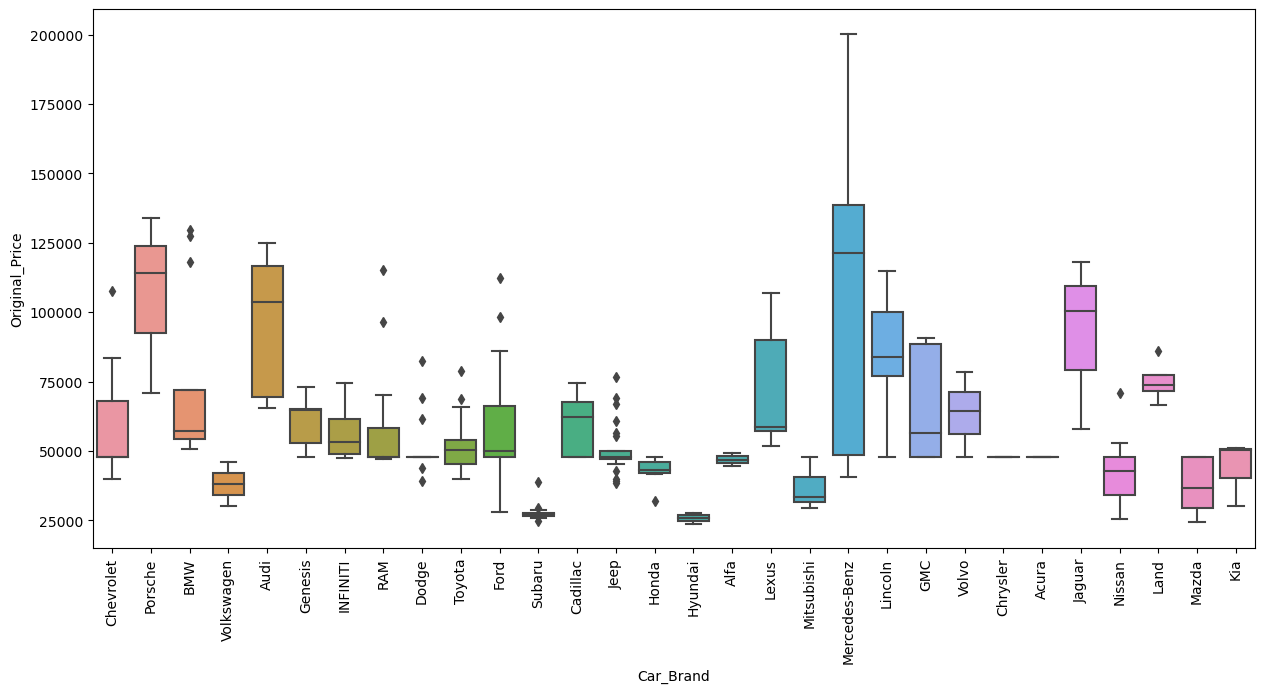

In [77]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.boxplot(x='Car_Brand',y='Original_Price',data=a)
plt.show()

In [81]:
pd.value_counts(a["Car_Brand"])

Ford             46
Jeep             24
Toyota           20
GMC              17
RAM              17
Dodge            16
Chevrolet        15
Lincoln          14
Subaru           14
BMW              13
Audi             11
Mercedes-Benz    11
Honda            10
Nissan            9
Mazda             8
Cadillac          8
Genesis           5
Lexus             5
INFINITI          4
Land              4
Volvo             3
Jaguar            3
Kia               3
Mitsubishi        3
Porsche           3
Alfa              2
Volkswagen        2
Hyundai           2
Chrysler          1
Acura             1
Name: Car_Brand, dtype: int64

# BoxPlot
### The above BoxPlot graph shows information about diiferent" Car Brands" and their "Price" in second hand (in USD) in America.Over all,we can observe that" Mercedes-Benz" has the largest variation in between the prices of vehicles "audi" prices have large variation.
### The Diamond shaped points are called outliers.

<Figure size 1000x1000 with 0 Axes>

([<matplotlib.patches.Wedge at 0x215fc4a68e0>,
 [Text(0.9697668752897372, -0.5191841750195971, 'Chevrolet'),
  Text(0.3902776619651559, -1.134761361067168, 'Porsche'),
  Text(-0.15231434300764418, -1.089403662979958, 'BMW'),
  Text(-0.5601478652347986, -0.9466965559633657, 'Volkswagen'),
  Text(-0.8600146100749844, -0.6858388079261576, 'Audi'),
  Text(-1.043961309790292, -0.3466190757314693, 'Genesis'),
  Text(-1.0999371998027643, 0.011753998896293572, 'INFINITI'),
  Text(-1.043961330073303, 0.3466190146422732, 'RAM'),
  Text(-0.8954133056345728, 0.6389327132746979, 'Dodge'),
  Text(-0.6766099658797146, 0.8672940412987118, 'Toyota'),
  Text(-0.43448824041366224, 1.010554287973803, 'Ford'),
  Text(-0.18715326460907458, 1.0839620175754157, 'Subaru'),
  Text(0.05874329716424148, 1.098430346011195, 'Cadillac'),
  Text(0.2790200118041876, 1.064024357339996, 'Jeep'),
  Text(0.46665481634615974, 0.9961090715282801, 'Honda'),
  Text(0.6293282963978235, 0.90218950079959, 'Hyundai'),
  Text(0.74

Text(0.5, 1.0, 'Car_Brands sold Second Hand')

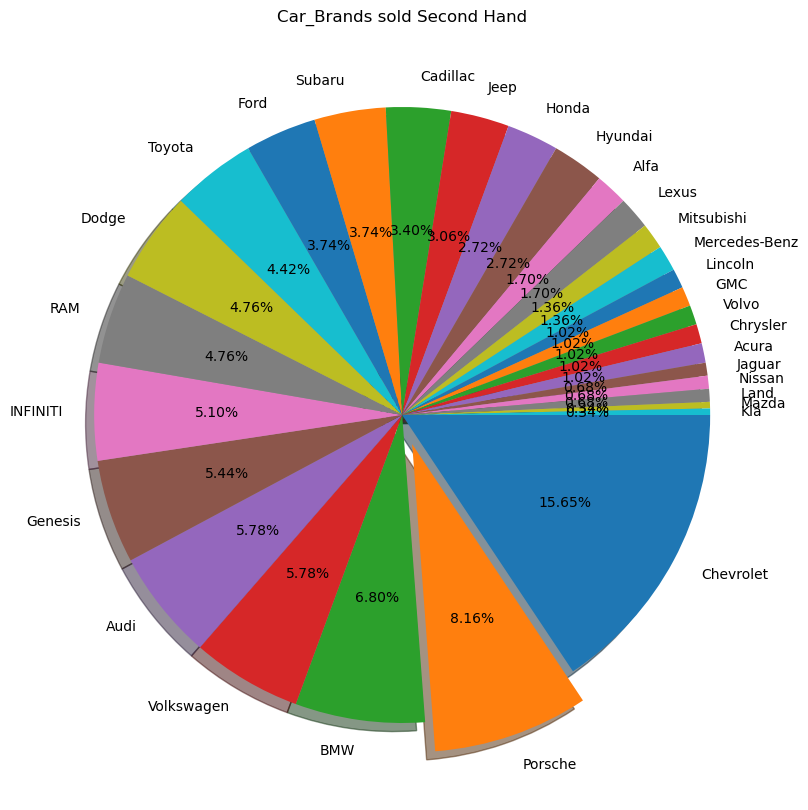

In [86]:
plt.figure(figsize=(10,10))
explode = (0, 0.1, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(values, labels= Brand,explode=explode,counterclock=False, 
        shadow=True, autopct='%0.2f%%')
plt.title('Car_Brands sold Second Hand') # 0 for best
plt.show()

# Pie-Chart
## The above PieChart  shows information about diiferent" Car Brands" and their "Share in Second Hand Market" in America.
#### Over all,we can observe that" Chevrolet" and "Porsche" cars are holding first and second places in the market .
#### KIA,Mazda,LandRover,Nissan,Jaguar,Land Rover,Jaguar are holding less share in the second hand market (i.e less than 1%).May be this is because the New cars bought by the customers is less (or) The customers who bought are not interested to sell their cars.

In [84]:
Brand=[]
for i in range(len(a)):
    if a['Car_Brand'][i] not in Brand:
        Brand.append(a['Car_Brand'][i])
print(Brand)
len(Brand)
    

['Chevrolet', 'Porsche', 'BMW', 'Volkswagen', 'Audi', 'Genesis', 'INFINITI', 'RAM', 'Dodge', 'Toyota', 'Ford', 'Subaru', 'Cadillac', 'Jeep', 'Honda', 'Hyundai', 'Alfa', 'Lexus', 'Mitsubishi', 'Mercedes-Benz', 'Lincoln', 'GMC', 'Volvo', 'Chrysler', 'Acura', 'Jaguar', 'Nissan', 'Land', 'Mazda', 'Kia']


30

In [85]:
values=pd.value_counts(a['Car_Brand'])


<AxesSubplot:xlabel='Manufacturing_Year', ylabel='Original_Price'>

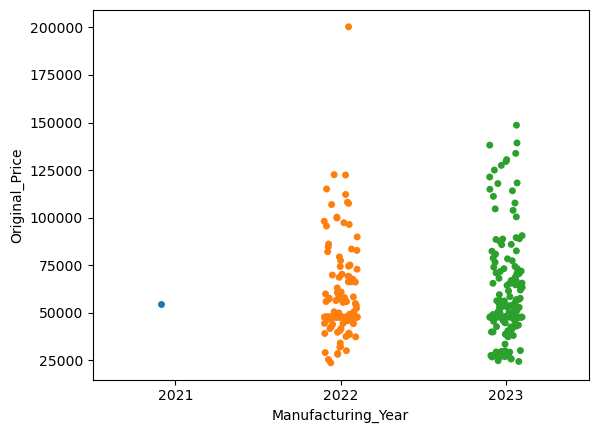

In [87]:
sns.stripplot(a['Manufacturing_Year'],a['Original_Price'])

# Scatter Plot
### The above Scatter Plot shows the Plot of "Manufacturing Year" and" Price".Here each(.) refers to each car unit.
#### We can see that the cars that are manufactured in recent year are at High-Cost comapred to the previous.
##### In the data we got, the maximum data is from 2022 & 2023.Only 1 car are from 2020 & 2021.

a

<Figure size 7680x5760 with 0 Axes>

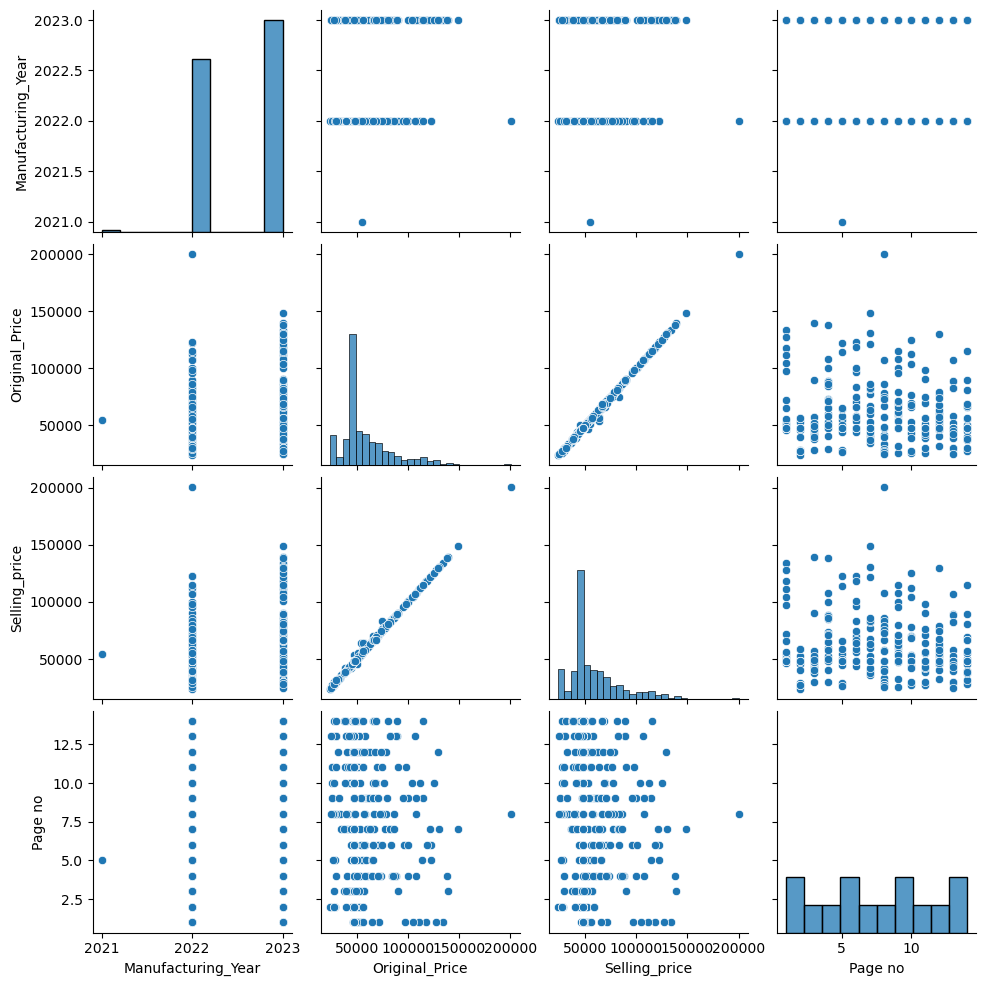

In [88]:
plt.figure(dpi = 1200)
#sns.pairplot(tips_df);
sns.pairplot(a);

In [150]:
a.corr()

,Manufacturing_Year,Original_Price,Selling_price,Page no
Manufacturing_Year,1.000000,0.161657,0.159567,-0.119040
Original_Price,0.161657,1.000000,0.999709,-0.027586
Selling_price,0.159567,0.999709,1.000000,-0.028017
Page no,-0.119040,-0.027586,-0.028017,1.000000


<AxesSubplot:>

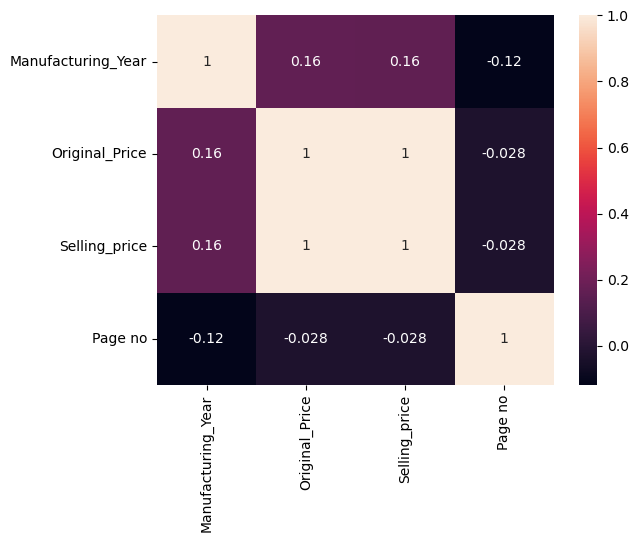

In [151]:
sns.heatmap(a.corr(),annot=True)